<a href="https://colab.research.google.com/github/Harshil1450/Harshil/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#EDA-1>>>>>>>>>>>>>>>>>>>>.
df=pd.read_csv("BIKE DETAILS.csv")
df

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]

In [3]:
#Q-1>> What is the range of selling prices in the dataset?
a=df['selling_price'].min()
b=df['selling_price'].max()
print(f"The range of selling prices in the dataset is {a} to {b}")

The range of selling prices in the dataset is 5000 to 760000


In [4]:
#Q-2>> What is the median selling price for bikes in the dataset?
c=df['selling_price'].median()
print(f"The median selling price for bikes in the dataset is {c}")

The median selling price for bikes in the dataset is 45000.0


In [5]:
#Q-3>> What is the most common seller type?
d=df['seller_type'].value_counts().idxmax()
print(f"The most common seller type is {d}")

The most common seller type is Individual


In [6]:
#Q-4>> How many bikes have driven more than 50,000 kilometers?
e=df[df['km_driven']>50000]
print(f"The No of bikes driven more than 50000 km is {len(e)}")

The No of bikes driven more than 50000 km is 170


In [7]:
#Q-5>> What is the average km_driven value for each ownership type?
f=df.groupby("owner").km_driven.mean()
print(f"The average km_driven value for each ownership type is {f}")

The average km_driven value for each ownership type is owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [8]:
#Q-6>> What proportion of bikes are from the year 2015 or older?
g=len(df[df['year']>=2015])/len(df)
print(f"The proportion of bikes are from the year 2015 or older is {g}")

The proportion of bikes are from the year 2015 or older is 0.527803958529689


In [9]:
#Q-7>> What is the trend of missing values across the dataset?
h=df.isnull().sum()
print(f"The trend of missing values across the dataset is {h}")

The trend of missing values across the dataset is name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [10]:
#Q-8>> What is the highest ex_showroom_price recorded, and for which bike?
j=df.groupby('name')['ex_showroom_price'].max().idxmax()
i=df['ex_showroom_price'].max()
print(f"The highest ex_showroom_price recorded is {i} by {j}")

The highest ex_showroom_price recorded is 1278000.0 by Harley-Davidson Street Bob


In [11]:
#Q-9>> What is the total number of bikes listed by each seller type?
k=df['seller_type'].value_counts()
print(f"The total number of bikes listed by each seller type is {f}")

The total number of bikes listed by each seller type is owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [12]:
#Q-10>> What is the relationship between selling_price and km_driven for first-owner bikes?
l=df[df['owner']=='First Owner']

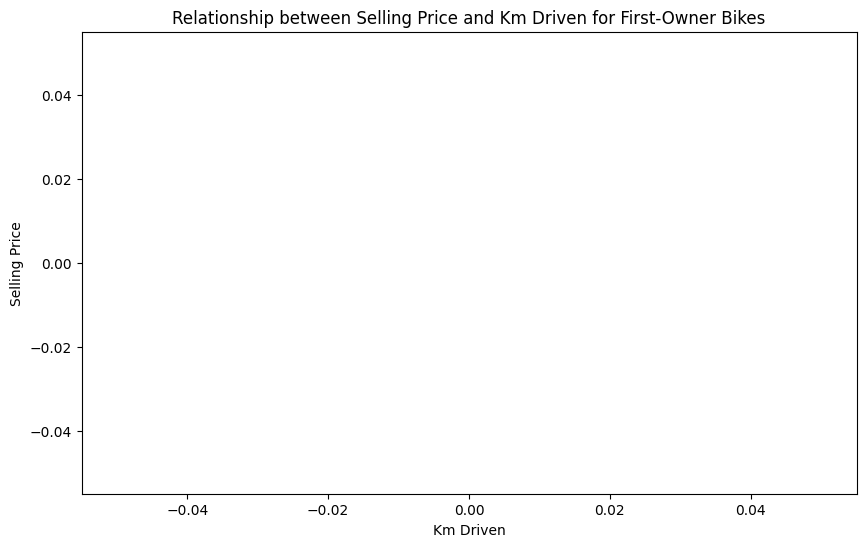

In [13]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(x='km_driven', y='selling_price', data=l)
plt.title('Relationship between Selling Price and Km Driven for First-Owner Bikes')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

In [14]:
correlation = l['selling_price'].corr(l['km_driven'])
print(f"The correlation between selling price and km driven for first-owner bikes is: {correlation}")

The correlation between selling price and km driven for first-owner bikes is: nan


In [15]:
#Q-11>>  Identify and remove outliers in the km_driven column using the IQR method?
m=df['km_driven']
q1 = m.quantile(0.25)
q3 = m.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = m[(m < lower_bound) | (m > upper_bound)]
df = df.drop(outliers.index)
df

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1054  1st owner      50000            78700.0  
1055  1st owner      35000            32000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  

[1022 rows x 7 columns]

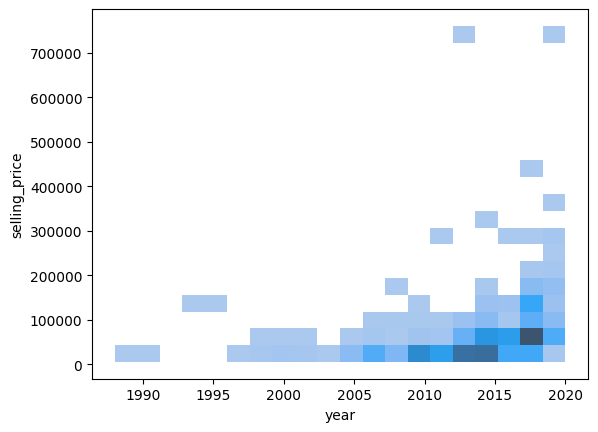

In [16]:
#Q-12>> Perform a bivariate analysis to visualize the relationship between year and selling_price?
sns.histplot(x='year', y='selling_price', data=df,bins=20)
plt.show()

In [17]:
#Q-13>> What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
n=df.groupby('year').selling_price.mean()
print(f"The average depreciation in selling price based on the bike's age is {n}")
n

The average depreciation in selling price based on the bike's age is year
1988     20000.000000
1991      6000.000000
1993    130000.000000
1995    150000.000000
1997     25000.000000
1998     28333.333333
1999     15000.000000
2000     20833.333333
2001     40000.000000
2002     20666.666667
2003      8000.000000
2004     16000.000000
2005     16978.571429
2006     23821.052632
2007     27768.181818
2008     36404.000000
2009     22934.782609
2010     32350.877193
2011     35931.017241
2012     36157.560606
2013     51802.816901
2014     49121.348315
2015     56313.131313
2016     57924.126214
2017     78962.121212
2018     87660.374046
2019    119689.511628
2020    183333.333333
Name: selling_price, dtype: float64


year
1988     20000.000000
1991      6000.000000
1993    130000.000000
1995    150000.000000
1997     25000.000000
1998     28333.333333
1999     15000.000000
2000     20833.333333
2001     40000.000000
2002     20666.666667
2003      8000.000000
2004     16000.000000
2005     16978.571429
2006     23821.052632
2007     27768.181818
2008     36404.000000
2009     22934.782609
2010     32350.877193
2011     35931.017241
2012     36157.560606
2013     51802.816901
2014     49121.348315
2015     56313.131313
2016     57924.126214
2017     78962.121212
2018     87660.374046
2019    119689.511628
2020    183333.333333
Name: selling_price, dtype: float64

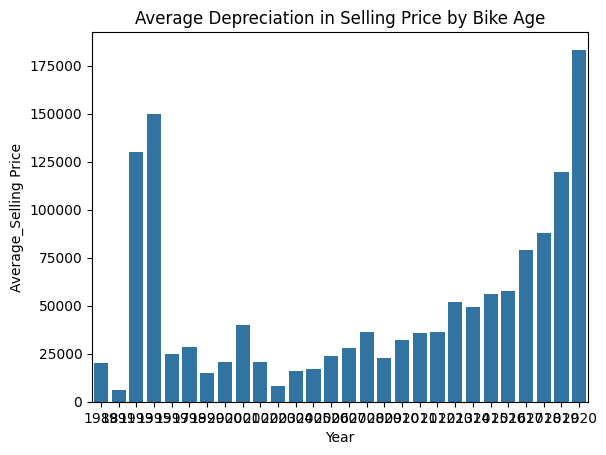

In [18]:
sns.barplot(n)
plt.figsize=(10,10)
plt.xlabel('Year')
plt.ylabel('Average_Selling Price')
plt.title('Average Depreciation in Selling Price by Bike Age')
plt.show()

In [19]:
#Q-14>> Which bike names are priced significantly above the average price for their manufacturing year?
average_price_by_year = df.groupby('year')['selling_price'].mean()
df = df.merge(average_price_by_year, on='year', suffixes=('', '_average'))
df

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1017                     Hero  CBZ Xtreme          20000  2010  Individual   
1018                        Bajaj  ct 100          18000  2017  Individual   
1019                     Honda CB twister          16000  2012  Individual   
1020                   Bajaj Discover 125          15000  2013  Individual   
1021                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  selling_price_average  
0     1st owner        350                NaN          119689.511628  
1     1st owner       5650                NaN           78962.121212  
2     1st owner      12000           148114.0           87660.374046  
3     1st owner      23000            89643.0           56313.131313  
4     2nd owner      21000                NaN           35931.017241  
...         ...        ...                ...                    ...  
1017  1st owner      50000            78700.0           32350.877193  
1018  1st owner      35000            32000.0           78962.121212  
1019  1st owner      33000            51000.0           36157.560606  
1020  2nd owner      35000            57000.0           51802.816901  
1021  1st owner      53000            58000.0           22934.782609  

[1022 rows x 8 columns]

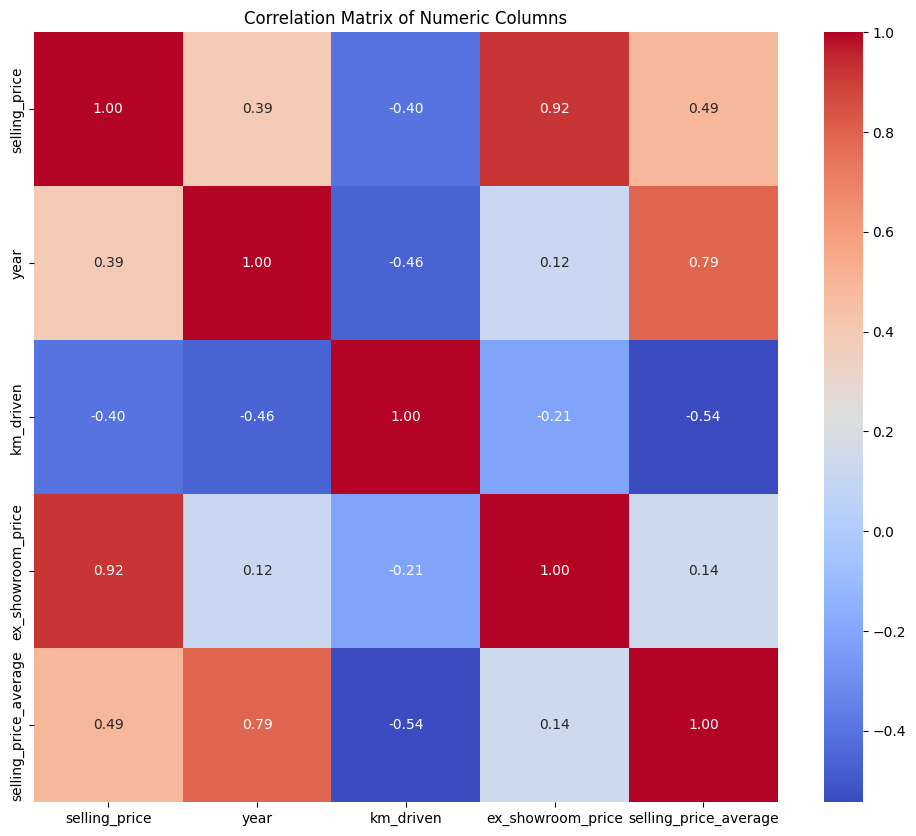

In [20]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [21]:
#EDA-2 >>>>>>>>>>>>>>>>>>>
df1=pd.read_csv("Car Sale.csv")
df1

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

The average selling price of cars for each dealer is Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                         

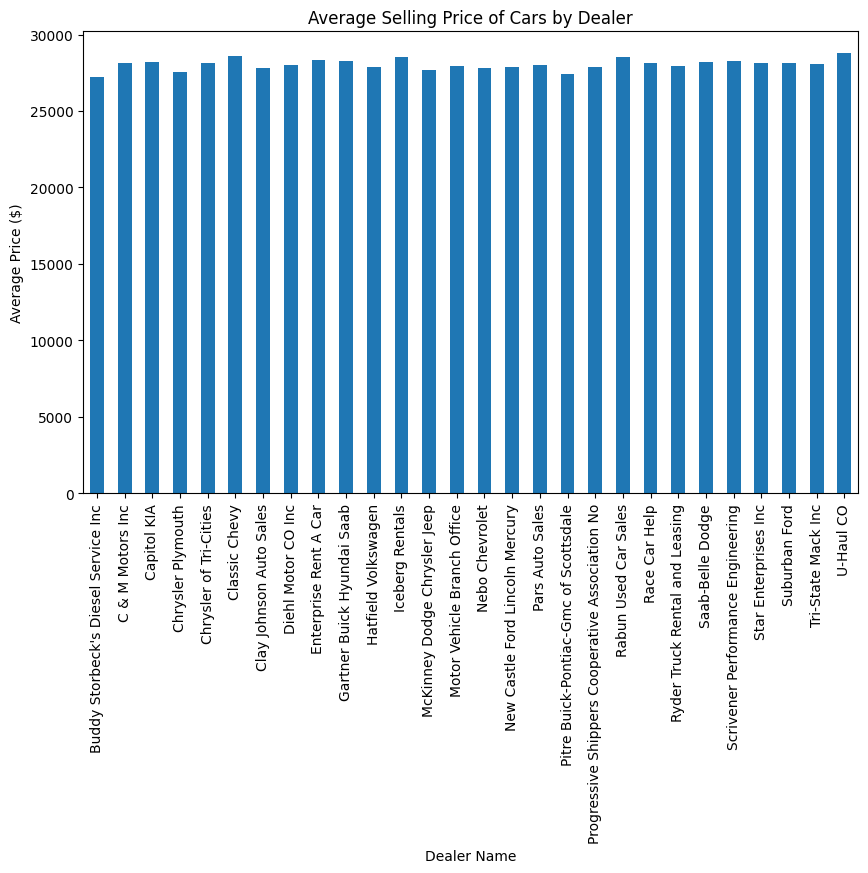

In [22]:
#Q-1>> What is the average selling price of cars for each dealer, and how does it compare across different dealers?
a=df1.groupby('Dealer_Name')['Price ($)'].mean()
print(f"The average selling price of cars for each dealer is {a}")
a.plot(kind='bar', figsize=(10, 6))
plt.title('Average Selling Price of Cars by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.show()

In [23]:
#Q-2>> Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
c=df1.groupby('Company')['Price ($)'].std()
d=c.idxmax()
print(f"The car brand with the highest variation in prices is {c}")

The car brand with the highest variation in prices is Company
Acura          8183.046414
Audi          12904.243867
BMW           15065.578723
Buick         17142.232626
Cadillac      19517.120220
Chevrolet     13311.063223
Chrysler      11583.286811
Dodge         11187.592085
Ford          15849.090227
Honda         11148.629062
Hyundai        3485.982649
Infiniti      13696.332844
Jaguar        10222.531533
Jeep           9459.834418
Lexus         17852.923492
Lincoln       19658.050211
Mercedes-B    15722.807459
Mercury       16445.172195
Mitsubishi    11671.343035
Nissan        16214.264017
Oldsmobile    15711.345857
Plymouth      19065.997338
Pontiac       14348.963592
Porsche        5261.839206
Saab          19653.740089
Saturn        15990.223671
Subaru        12920.771620
Toyota        15367.131714
Volkswagen    12527.124011
Volvo         12933.790185
Name: Price ($), dtype: float64


The distribution of car prices for each transmission type is Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


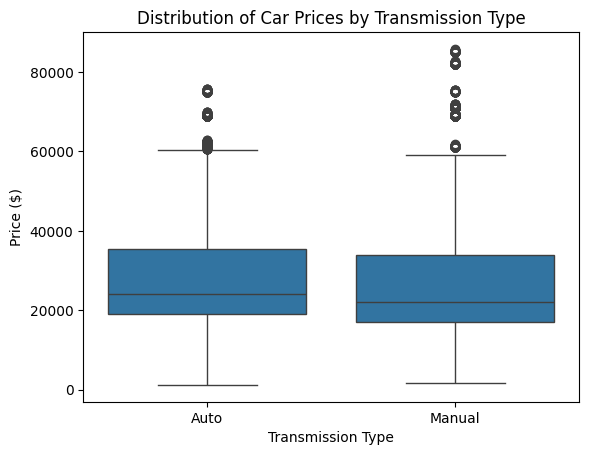

In [24]:
#Q-3>> What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
d=df1.groupby('Transmission')['Price ($)'].quantile(0.75)-df1.groupby('Transmission')['Price ($)'].quantile(0.25)
print(f"The distribution of car prices for each transmission type is {d}")
sns.boxplot(x='Transmission', y='Price ($)', data=df1)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

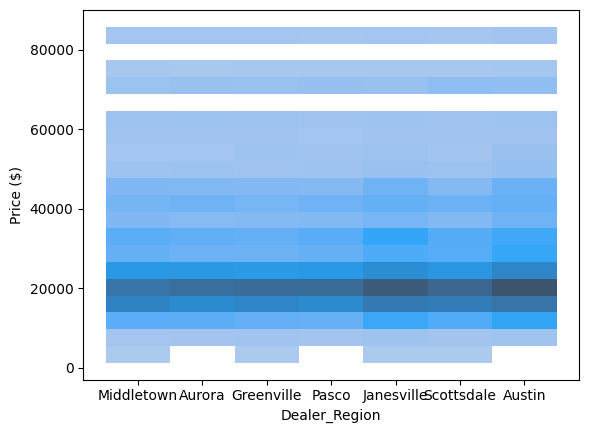

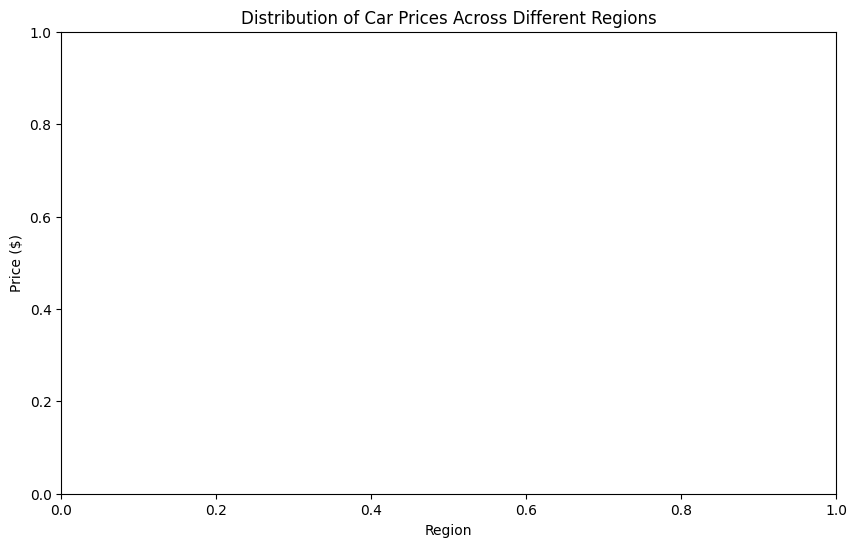

In [25]:
#Q-4>> What is the distribution of car prices across different regions?
sns.histplot(x='Dealer_Region', y='Price ($)', data=df1,bins=20, kde=True)
plt.figure(figsize=(10, 6))
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.show()

The distribution of cars based on body styles is:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


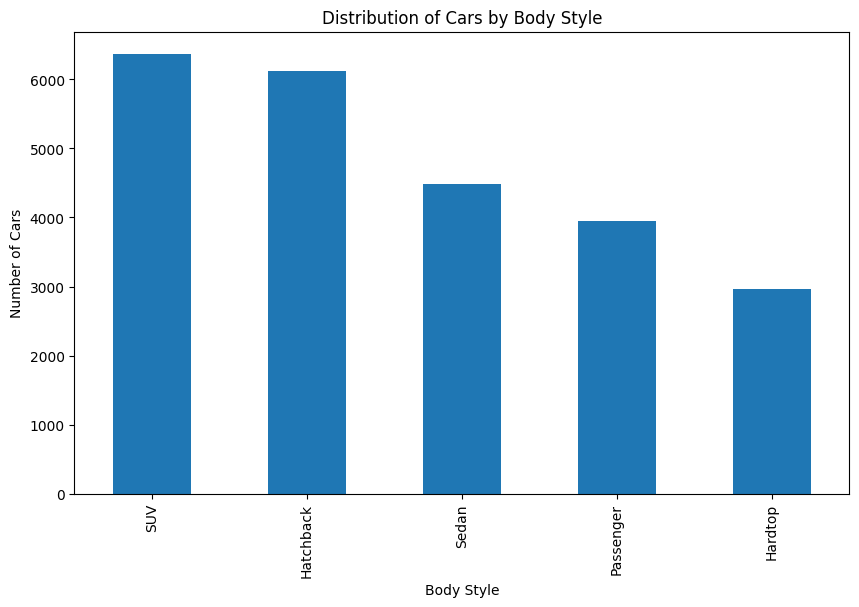

In [26]:
#Q-5>> What is the distribution of cars based on body styles?
body_style_distribution = df1['Body Style'].value_counts()
print(f"The distribution of cars based on body styles is:\n{body_style_distribution}")
body_style_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.show()

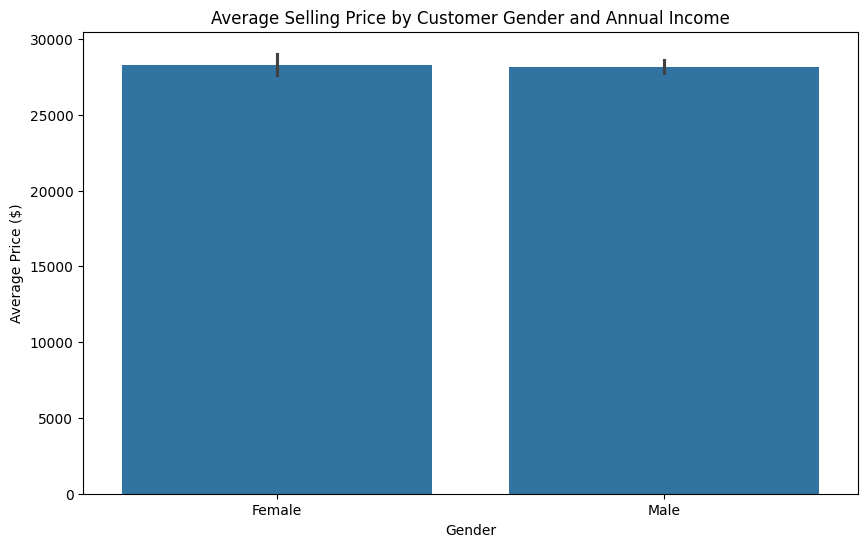

In [27]:
#Q-6>> How does the average selling price of cars vary by customer gender and annual income?
p=df1.groupby(['Gender','Annual Income'])['Price ($)'].mean().reset_index()
p
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Price ($)', data=p)
plt.title('Average Selling Price by Customer Gender and Annual Income')
plt.xlabel('Gender')
plt.ylabel('Average Price ($)')
plt.show()

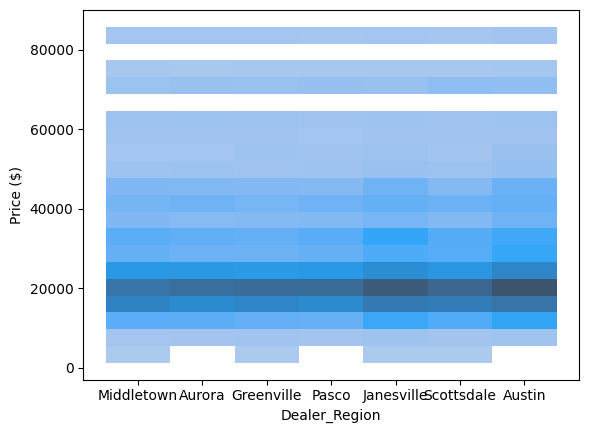

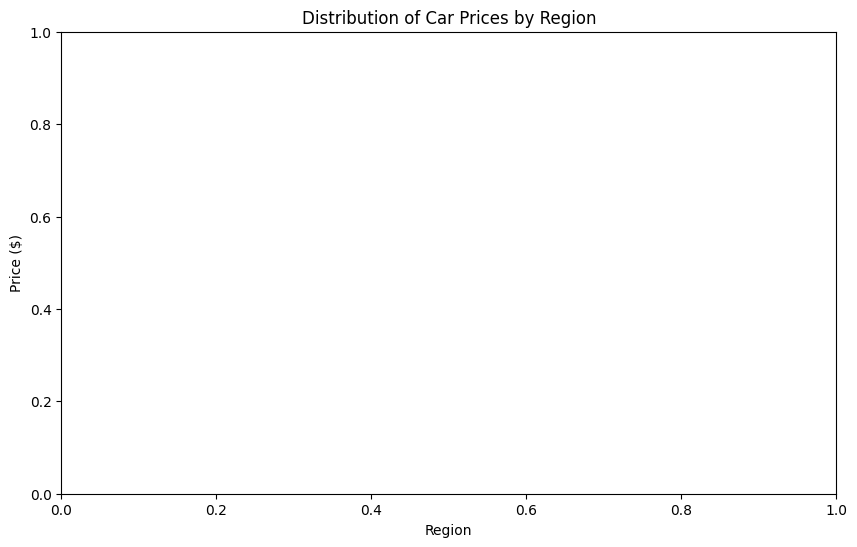

In [28]:
#Q-7>> What is the distribution of car prices by region, and how does the number of cars sold vary by region?
sns.histplot(x='Dealer_Region', y='Price ($)', data=df1,bins=20, kde=True)
plt.figure(figsize=(10, 6))
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.show()

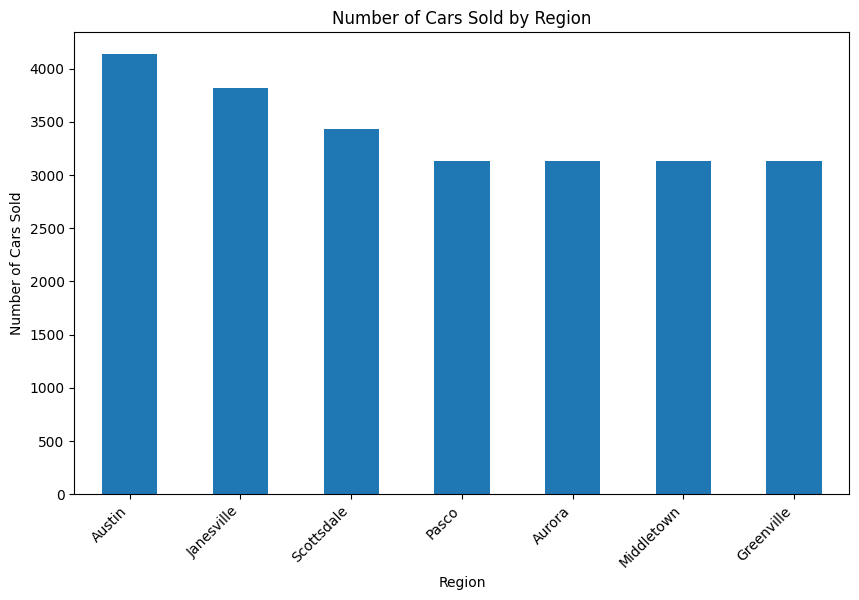

In [29]:
cars_sold_by_region = df1['Dealer_Region'].value_counts()
plt.figure(figsize=(10, 6))
cars_sold_by_region.plot(kind='bar')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

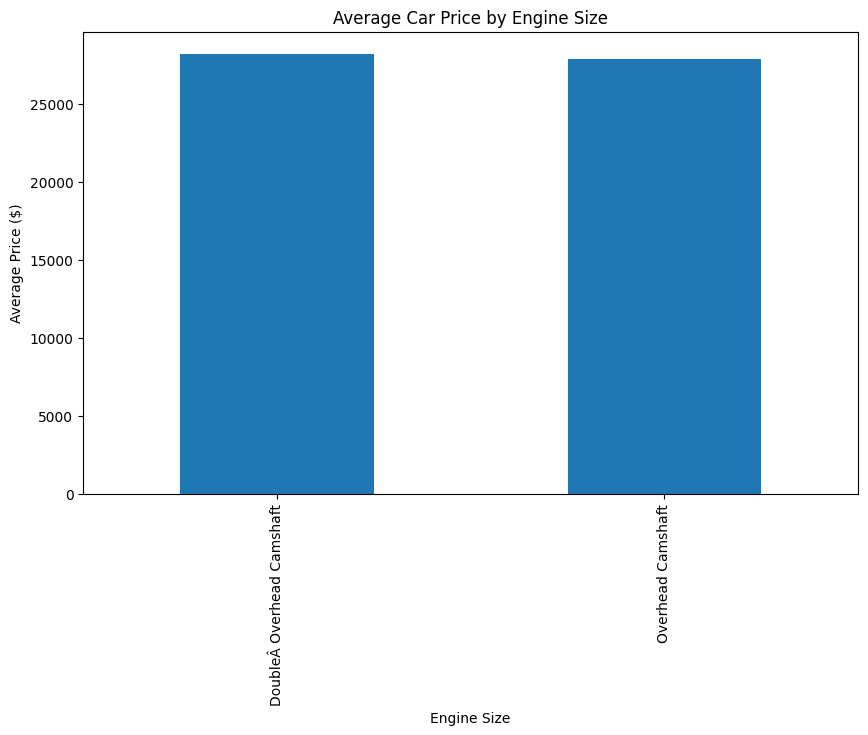

In [30]:
#Q-8>> How does the average car price differ between cars with different engine sizes?
e=df1.groupby('Engine')['Price ($)'].mean()
plt.figure(figsize=(10, 6))
e.plot(kind='bar')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.show()

In [31]:
#Q-9>> How do car prices vary based on the customer’s annual income bracket?
l=df1.groupby("Annual Income")['Price ($)'].mean()

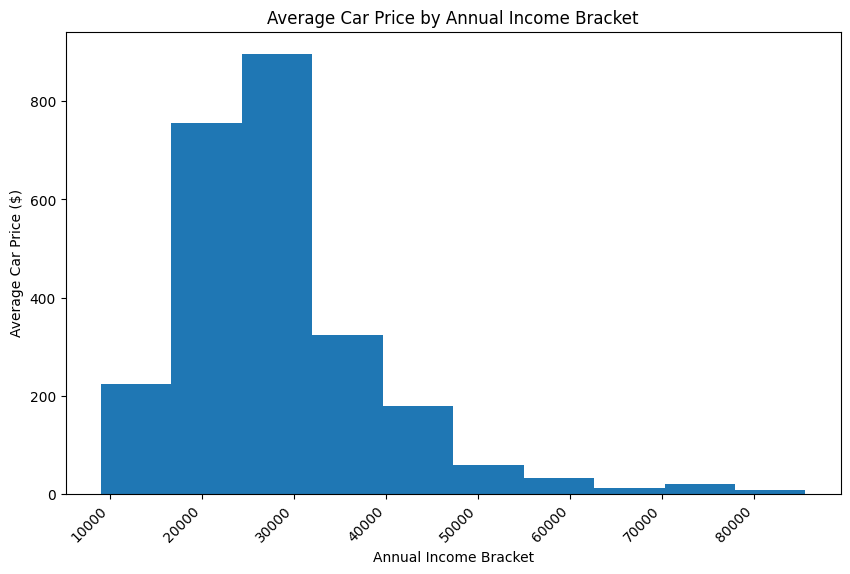

In [32]:
plt.figure(figsize=(10, 6))
l.plot(kind='hist')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The top 5 car models with the highest number of sales are:
Model
LS400            14263424
Jetta            12287736
Silhouette       12271849
Montero Sport    11472231
Ram Pickup       10655391
Name: Price ($), dtype: int64


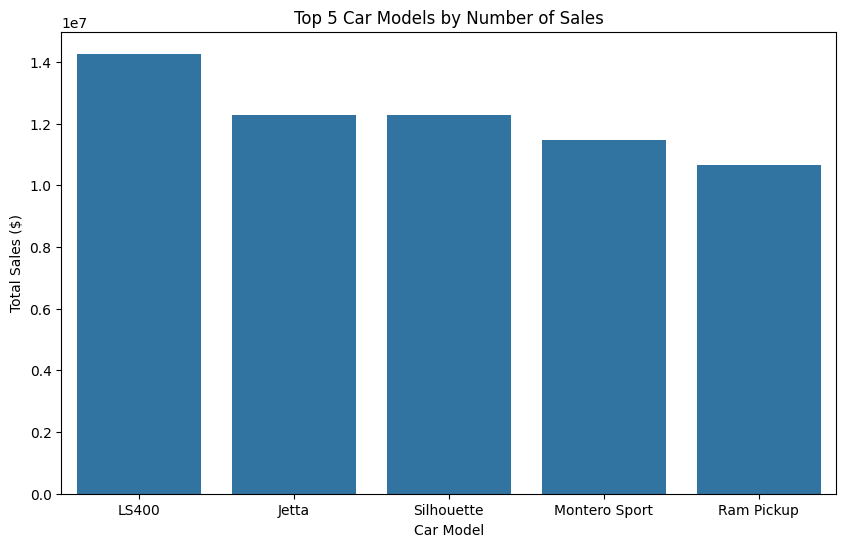

In [33]:
#Q-10>> What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df1.groupby('Model')['Price ($)'].sum().nlargest(5)
print(f"The top 5 car models with the highest number of sales are:\n{top_5_models}")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_models.index, y=top_5_models.values)
plt.title('Top 5 Car Models by Number of Sales')
plt.xlabel('Car Model')
plt.ylabel('Total Sales ($)')
plt.show()

In [34]:
#Q-11> How does car price vary with engine size across different car colors, and which colors have the highest price variation?
q=df1.groupby(['Color','Engine'])['Price ($)'].mean().reset_index()
q

Color                     Engine     Price ($)
0       Black  DoubleÂ Overhead Camshaft  25766.451103
1       Black          Overhead Camshaft  31732.967164
2  Pale White  DoubleÂ Overhead Camshaft  30347.987460
3  Pale White          Overhead Camshaft  24327.767694
4         Red  DoubleÂ Overhead Camshaft  27434.392314
5         Red          Overhead Camshaft  30153.405229

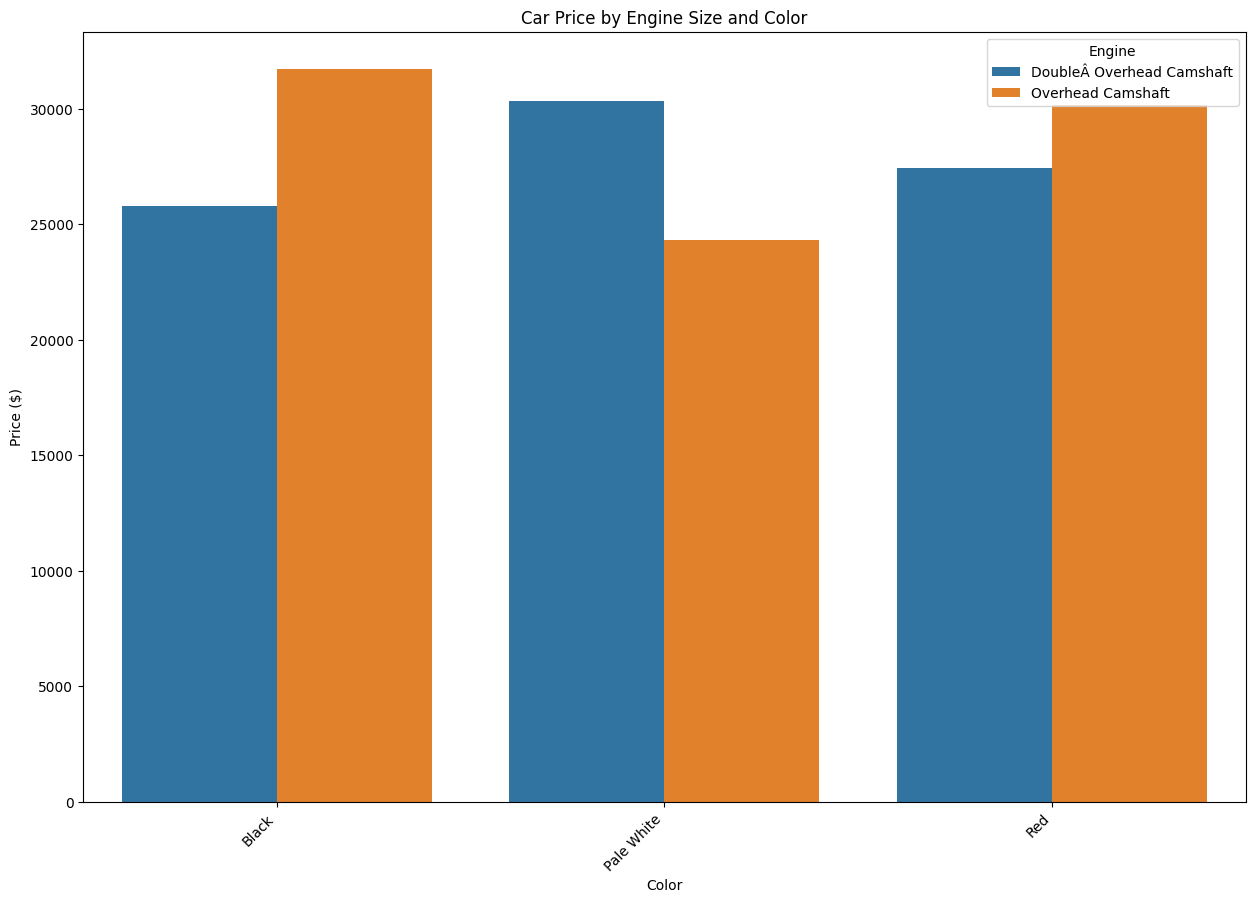

In [35]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Color', y='Price ($)',hue="Engine", data=q)
plt.title('Car Price by Engine Size and Color')
plt.xlabel('Color')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [36]:
color_price_variation = df1.groupby('Color')['Price ($)'].std().reset_index()

In [37]:
highest_variation_colors = color_price_variation.sort_values(by='Price ($)', ascending=False).head(5)
print(f"Colors with the highest price variation:\n{highest_variation_colors}")

Colors with the highest price variation:
        Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


In [38]:
df1

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

In [39]:
#Q=12>> Is there any seasonal trend in car sales based on the date of sale?
df1['Date of Sale'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date of Sale'].dt.month
df1

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region Date of Sale  Month  
0      06457-3834        SUV  8264678    Middletown   2022-01-02      1  
1      60504-7114        SUV  6848189        Aurora   2022-01-02      1  
2      38701-8047  Passenger  7298798    Greenville   2022-01-02      1  
3      99301-3882        SUV  6257557         Pasco   2022-01-02      1  
4      53546-9427  Hatchback  7081483    Janesville   2022-01-02      1  
...           ...        ...      ...           ...          ...    ...  
23901  60504-7114  Passenger  8583598         Pasco   2023-12-31     12  
23902  06457-3834    Hardtop  7914229    Middletown   2023-12-31     12  
23903  99301-3882      Sedan  7659127    Scottsdale   2023-12-31     12  
23904  53546-9427  Passenger  6030764        Austin   2023-12-31     12  
23905  38701-8047    Hardtop  7020564    Middletown   2023-12-31     12  

[23906 rows x 18 columns]

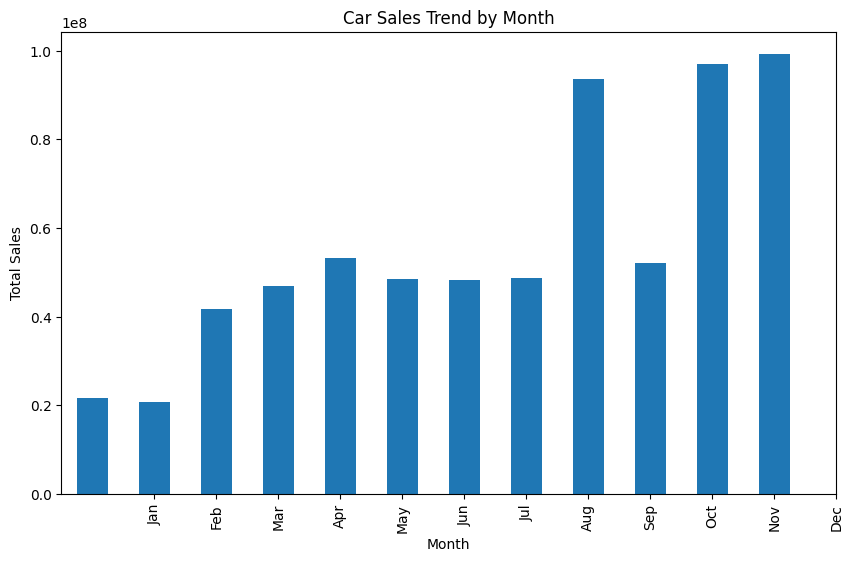

In [40]:
monthly_sales = df1.groupby('Month')['Price ($)'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Car Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

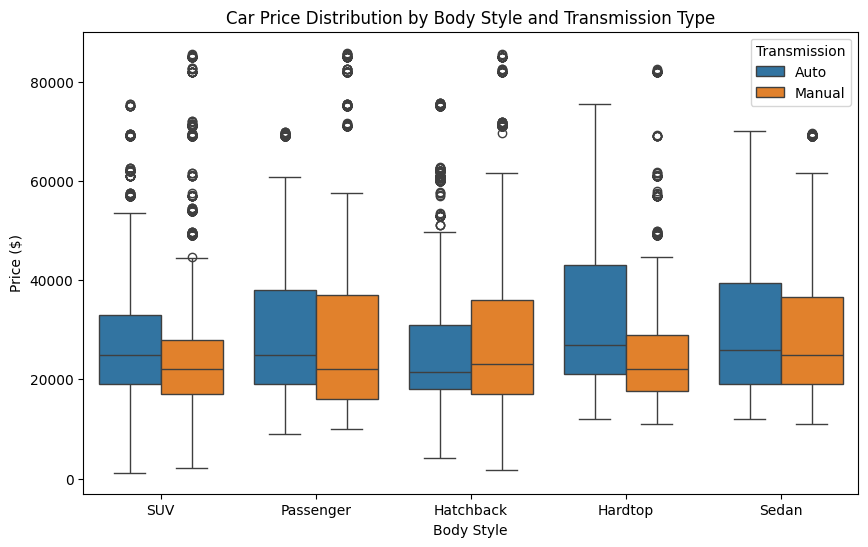

In [41]:
#Q-13>> How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df1)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.show()


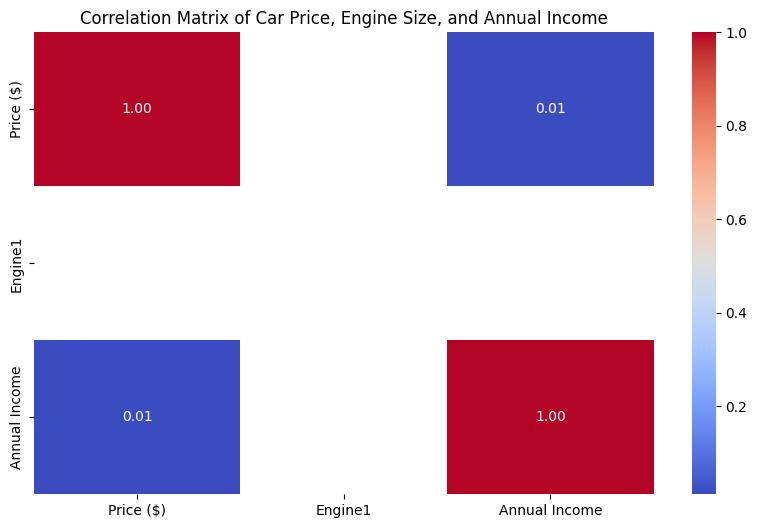

In [136]:
#Q-14>> What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
mapping = {'DoubleÂ Overhead Camshaft': 1, 'Overhead Camshaft': 2}
df1['Engine1'] = df1['Engine'].map(mapping)

correlation_matrix = df1[['Price ($)', 'Engine1', 'Annual Income']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Car Price, Engine Size, and Annual Income')
plt.show()

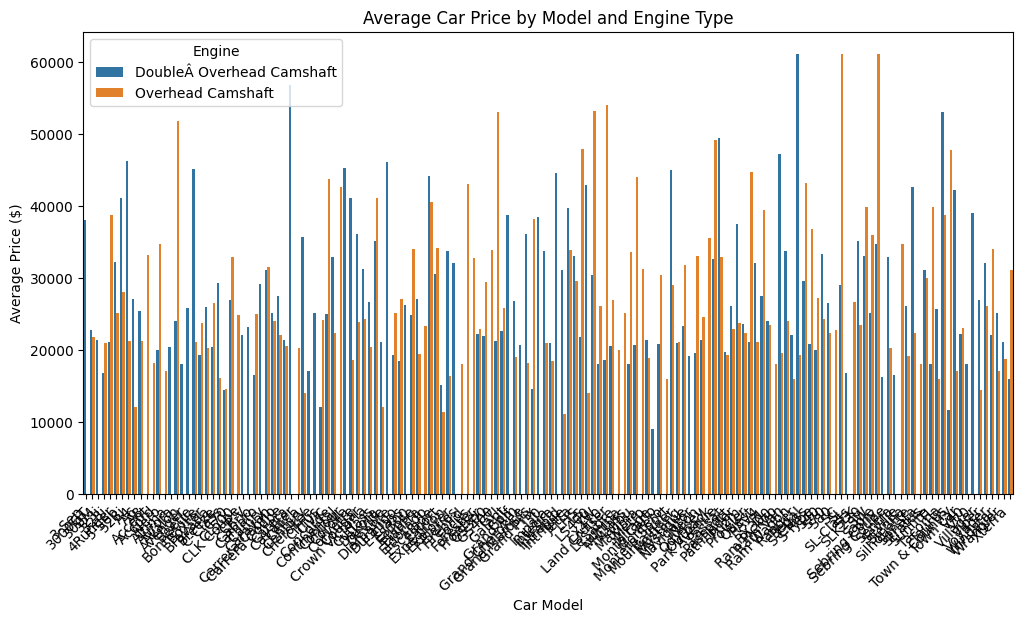

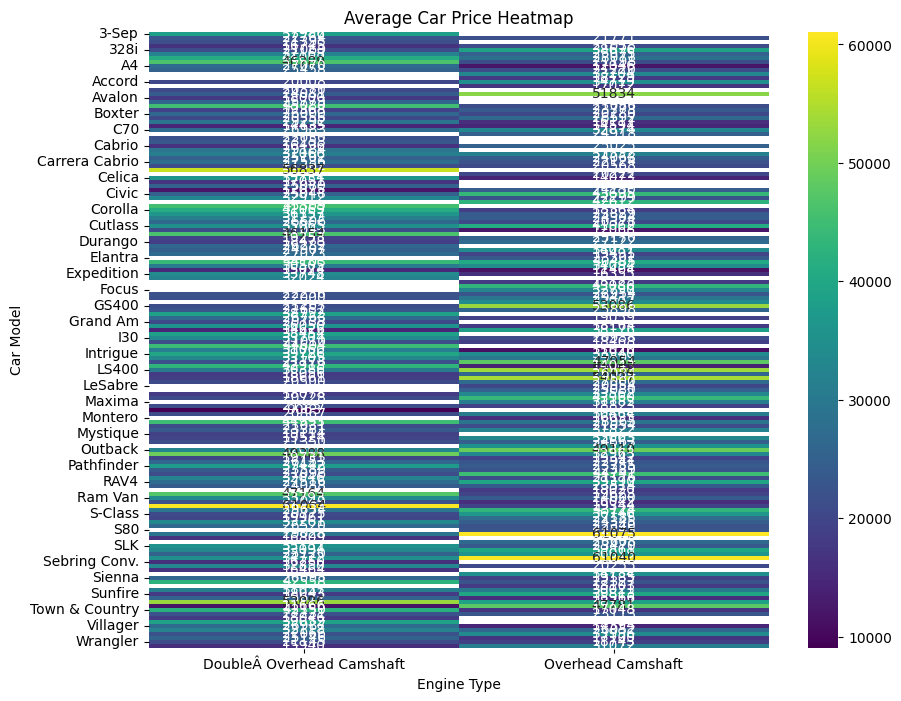

In [43]:
#Q-15>>
model_engine_prices = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.barplot(x='Model', y='Price ($)', hue='Engine', data=model_engine_prices)
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

pivot_table = model_engine_prices.pivot(index='Model', columns='Engine', values='Price ($)')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".0f")  # Adjust formatting as needed
plt.title('Average Car Price Heatmap')
plt.xlabel('Engine Type')
plt.ylabel('Car Model')
plt.show()

In [47]:
#EDA--3>>>>>>>>>>>>>>>>>>.
df2=pd.read_csv("amazon.csv")
df2

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%    4.0       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

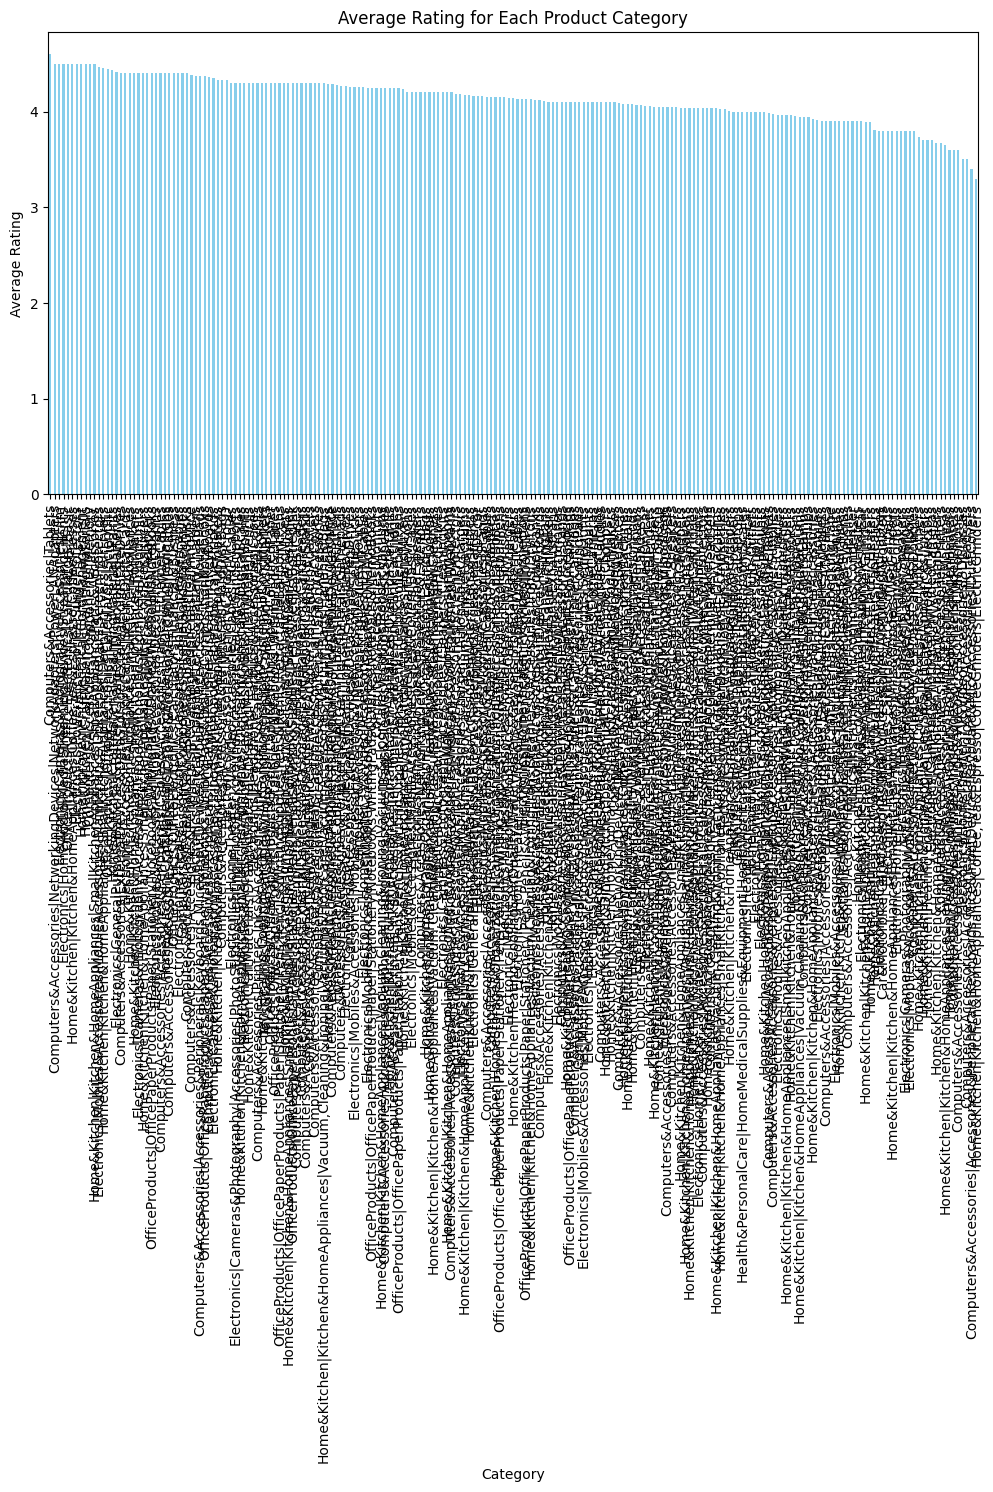

In [51]:
#Q-1>>  What is the average rating for each product category?
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')
avg_rating_by_category = df2.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_rating_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Rating for Each Product Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


In [52]:
#Q-2>>What are the top rating_count products by category?
top_products = df2.groupby('category').apply(lambda x: x.sort_values('rating_count', ascending=False).head(5))
top_products



product_id  \
category                                                              
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  B0912WJ87V   
Computers&Accessories|Accessories&Peripherals|A... 695   B097C564GC   
                                                   742   B094DQWV9B   
Computers&Accessories|Accessories&Peripherals|A... 906   B009LJ2BXA   
Computers&Accessories|Accessories&Peripherals|A... 772   B08HD7JQHX   
...                                                             ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 858   B00LOD70SC   
OfficeProducts|OfficePaperProducts|Paper|Statio... 850   B07SBGFDX9   
                                                   919   B00LZPQVMK   
                                                   955   B0746N6WML   
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies... 924   B00DJ5N9VK   

                                                                                              product_name  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories|Accessories&Peripherals|A... 695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
                                                   742   Kanget [2 Pack] Type C Female to USB A Male Ch...   
Computers&Accessories|Accessories&Peripherals|A... 906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
Computers&Accessories|Accessories&Peripherals|A... 772   HUMBLE Dynamic Lapel Collar Mic Voice Recordin...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 858   Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 850      Pentonic Multicolor Ball Point Pen, Pack of 10   
                                                   919   Parker Vector Standard Chrome Trim Ball Pen (I...   
                                                   955   Parker Vector Camouflage Gift Set - Roller Bal...   
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies... 924   Faber-Castell Connector Pen Set - Pack of 25 (...   

                                                                                                  category  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
Computers&Accessories|Accessories&Peripherals|A... 695   Computers&Accessories|Accessories&Peripherals|...   
                                                   742   Computers&Accessories|Accessories&Peripherals|...   
Computers&Accessories|Accessories&Peripherals|A... 906   Computers&Accessories|Accessories&Peripherals|...   
Computers&Accessories|Accessories&Peripherals|A... 772   Computers&Accessories|Accessories&Peripherals|...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 858   OfficeProducts|OfficePaperProducts|Paper|Stati...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
                                                   919   OfficeProducts|OfficePaperProducts|Paper|Stati...   
                                                   955   OfficeProducts|OfficePaperProducts|Paper|Stati...   
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies... 924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                                        discounted_price  \
category                                                                   
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157           ₹2,339   
Computers&Accessories|Accessories&Periphera

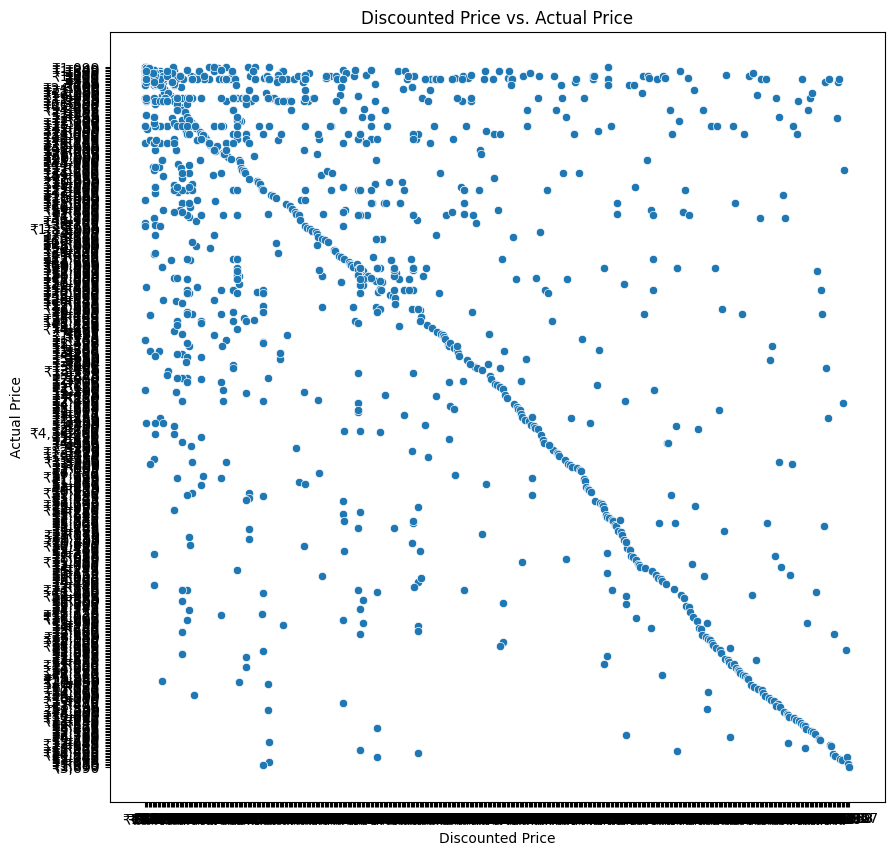

In [53]:
#Q-3>> What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(10, 10))
sns.scatterplot(x='discounted_price', y='actual_price', data=df2)
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.show()


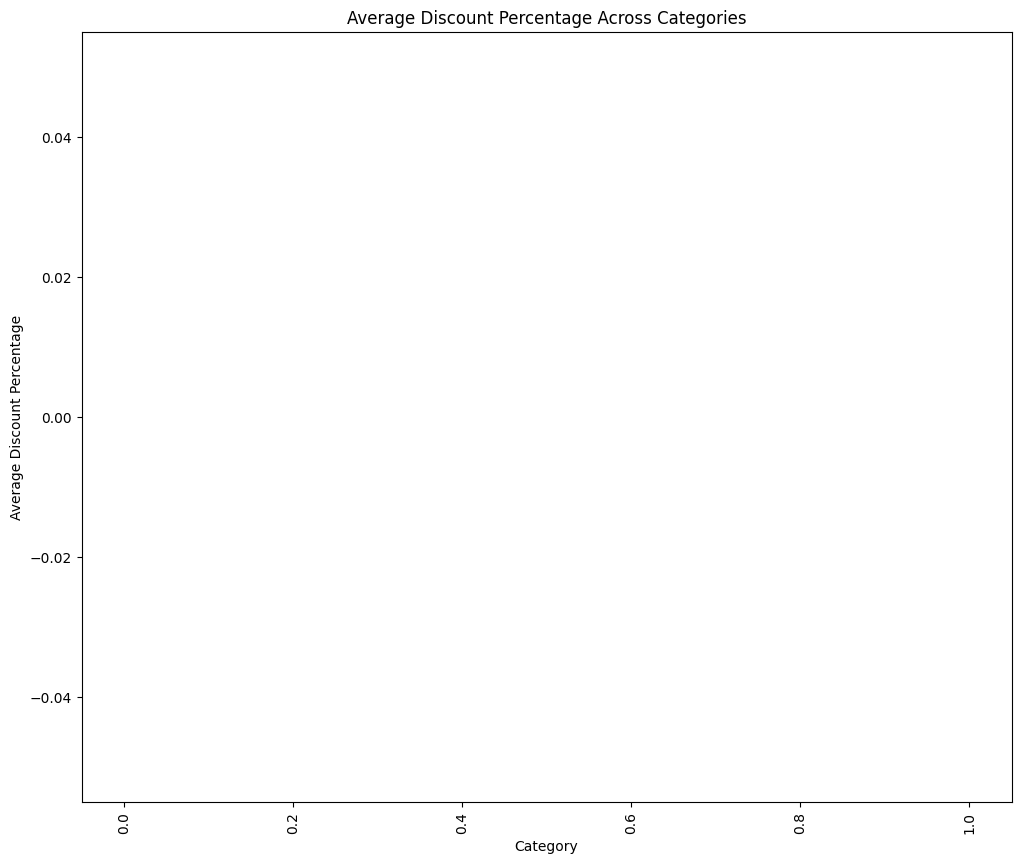

In [60]:
#Q-4>> How does the average discount percentage vary across categories?
df2['discount_percentage'] = pd.to_numeric(df2['discount_percentage'], errors='coerce')
avg_discount_by_category = df2.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 10))
avg_discount_by_category.plot(kind='hist', color='green')
plt.title('Average Discount Percentage Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)
plt.show()

In [65]:
#Q-5>> Most popular product names by rating count
df2['rating_count'] = pd.to_numeric(df2['rating_count'], errors='coerce')
popular_products = df2.groupby('product_name')['rating_count'].sum().sort_values(ascending=False)
popular_products.head(10)

product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            2445.0
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)          1948.0
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)            1806.0
Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White                                    1312.0
Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R/ 9 pro/ 9RT/ 10R/ Nord & for All Type C Devices – Red, 1 Meter    1151.0
SWAPKART Fast Charging Cable and Data Sync USB Cable Compatible for iPhone 6/6S/7/7+/8/8+/10/11, 12, 13 Pro max iPad Air/Mini, iPod and iOS Devices (White)                                           1072.0
Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)                                            992.0
Eveready Red 1012 AAA Batteries - Pack of 10                                                                                                                                                           989.0
Pigeon 1.5 litre Hot Kettle and Stainless Steel Water Bottle Combo used for boiling Water, Making Tea and Coffee, Instant Noodles, Soup, 1500 Watt with Auto Shut- off Feature - (Silver)              976.0
Zoul USB Type C Fast Charging 3A Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31s M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (1M, Grey)                             974.0
Name: rating_count, dtype: float64

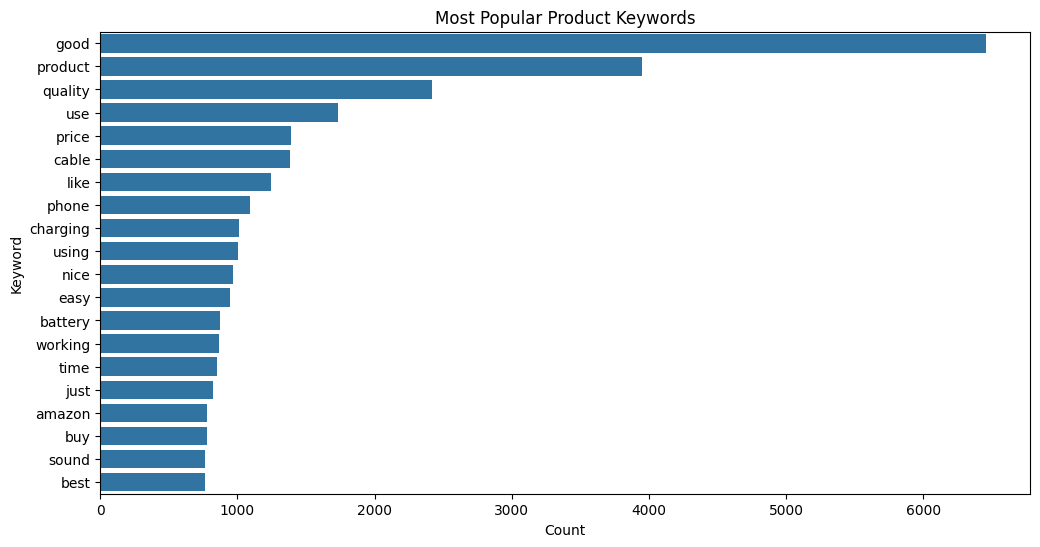

In [67]:
#Q-6>>  What are the most popular product keywords?
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df2['review_content'])

word_count = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

keyword_df = pd.DataFrame(zip(words, word_count), columns=['Keyword', 'Count'])

keyword_df = keyword_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Keyword', data=keyword_df)
plt.title('Most Popular Product Keywords')
plt.show()


In [69]:
#Q-7>> What are the most popular product reviews?
popular_reviews = df2.groupby('review_content')['rating'].sum().sort_values(ascending=False)
popular_reviews.head(10)


review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a little. Personally, this is good for me.At this price range, this is a good phone. But if you are camera heavy user and expect to perform heavy downloads frequently, this phone may not for you. I am personally satisfied with this phone as it works for my type of usage. I will not go into plus points of this phone as they are covered by other reviews already. I am only attempting to clarify about how this phone can suit you (or not) in terms of camera and heating. I had many questions about these aspects before buying. Perhaps this review will help you make an informed decision to buy (or avoid). Cheers.,Display - BeautyCamera - decentPerformance - AmazingBattery - ok (in 5000mah u expect more tbh)Overall good phone...Also after 1day of use, i found some network connectivity issue in my jiosim, which I'm using right now in this phone, but I'll keep update this review after 1month of usage!,It's a decent mobile under this price but few things worried me , weight of the phone, too many procedure to change some settings, no screen casting. Apart from that it has good touch, a decent camera for day light , battery life is good.,I bought this smartphone for my mom. Samusung interface is very handful for easy use. Battery is superb, last whole day. Camera is mediocre but provide original colour pictures. All in all satisfied with this smartphone that i got in sale for 9499.,Unable to do video call within same service provider as in VOLTE within same service provider video call feature is available.,Product is fine.  Nothing Fancy but for the budget it is a good phone.,BATTERY : more than enough for normal use  Not sure in gamingCAMERA : good in this segment , can record  videos in FHD 30fpsDISPLAY : since it's a LCD display the quality is  a bit less , but goodV RAM : you can add upto 2gb of virtual ram  but have to sacrifice your storage  Space to use it  OVERALL A GOOD BUDGET PHONE,Finger print is working speedy battery backup is good camera quality is also good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [141]:
#Q-8>>  What is the correlation between discounted_price and rating?
df2['discounted_price'] = df2['discounted_price'].str.replace('₹','').str.replace(',','')
df2['discounted_price'] = pd.to_numeric(df2['discounted_price'], errors='coerce')
correlation = df2['discounted_price'].corr(df2['rating'])
print(f'Correlation between Discounted Price and Rating: {correlation}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=correlation)
plt.title('Discounted Price vs. Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()


AttributeError: Can only use .str accessor with string values!

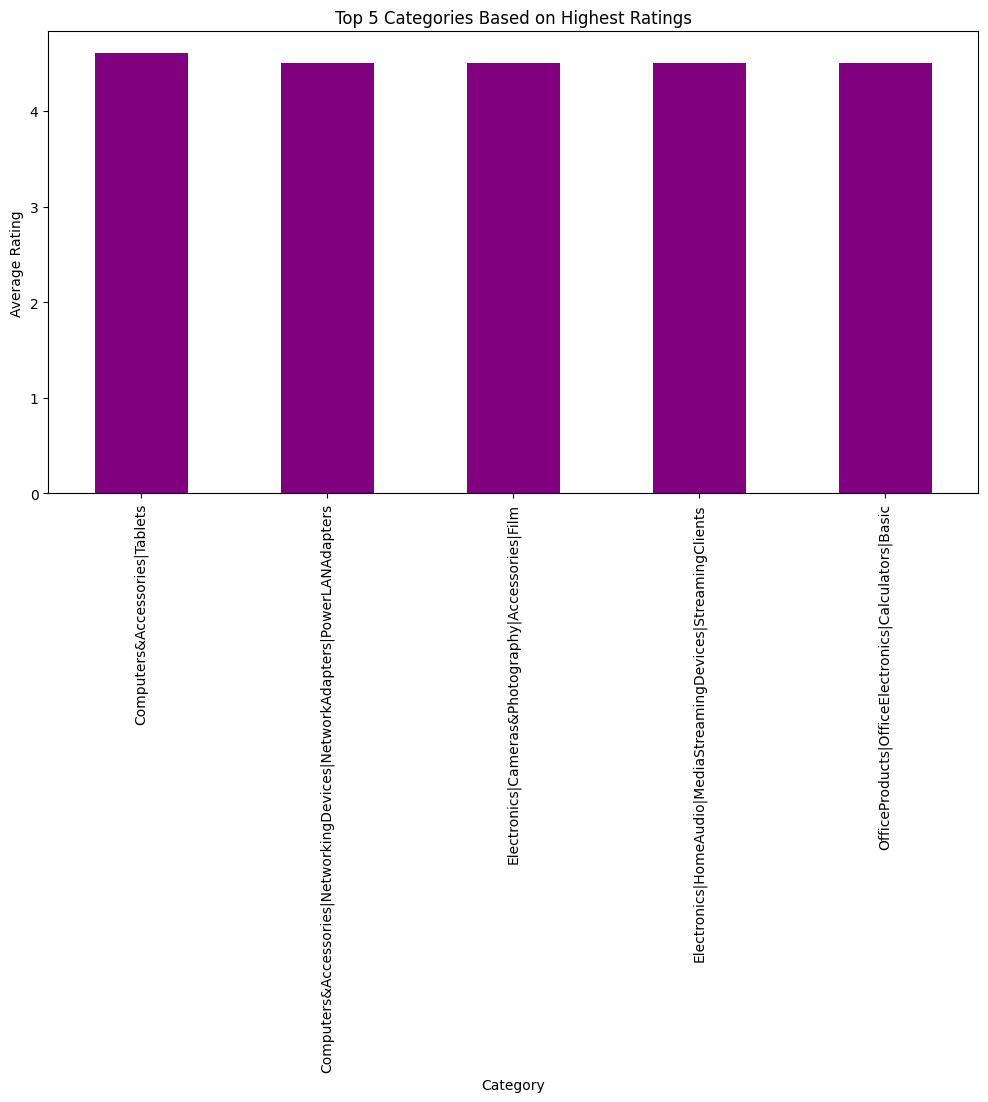

In [78]:
#Q-9>> Top 5 categories based on highest average ratings
top_categories = avg_rating_by_category.head(5)

plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='purple')
plt.title('Top 5 Categories Based on Highest Ratings')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


In [80]:
#Q-10>> Identify any potential areas for improvement or optimization based on the data analysis.

Based on the data analysis above, areas of improvement can be identified. For example:

Categories with low ratings: Are there categories with low average ratings? These products may need quality improvement or better customer engagement.
Discounts and Ratings: If higher discounts do not correlate with higher ratings, consider reevaluating pricing or product quality strategies.
Popular but low-rated products: Products with high rating_count but low ratings could signal customer dissatisfaction, requiring product improvements or better product descriptions.


In [81]:
#EDA-4>>>>>>>>>>>>>>>>>>>.
df3=pd.read_csv("spotify.csv")

In [82]:
df3

Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e  

[440 rows x 5 columns]

In [89]:
#Q-1>> Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
df3.isnull().sum()


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [90]:
df3.duplicated().sum()

27

In [93]:
df3.drop_duplicates(inplace=True)
df3

Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
433  French Montana                                       Stand United   
434    Jason Derulo                     Tip Toe (feat. French Montana)   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
433          54         163971  01CHrTerCzyRpMI1MzQ4fz  
434          65         187521  0TY3jVGwGDwDabLyQLVRQQ  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  

[413 rows x 5 columns]

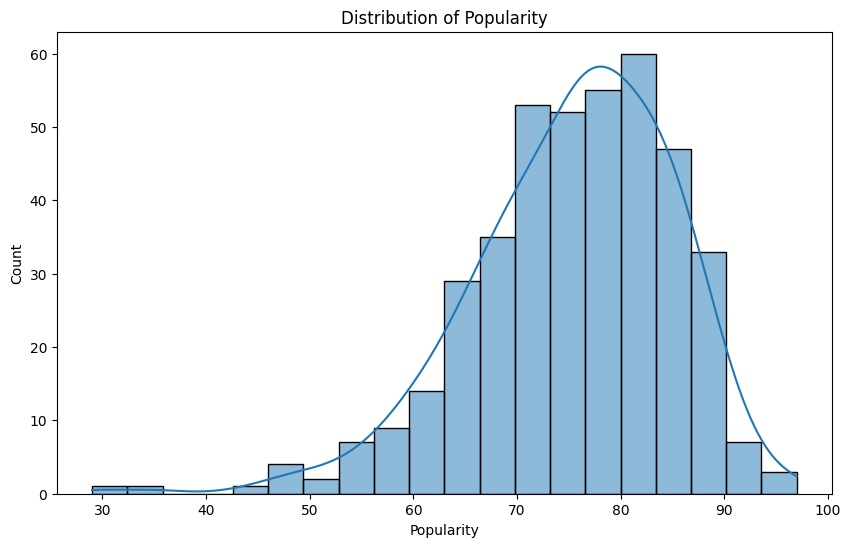

In [97]:
#Q-2>>  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df3['Popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.show()

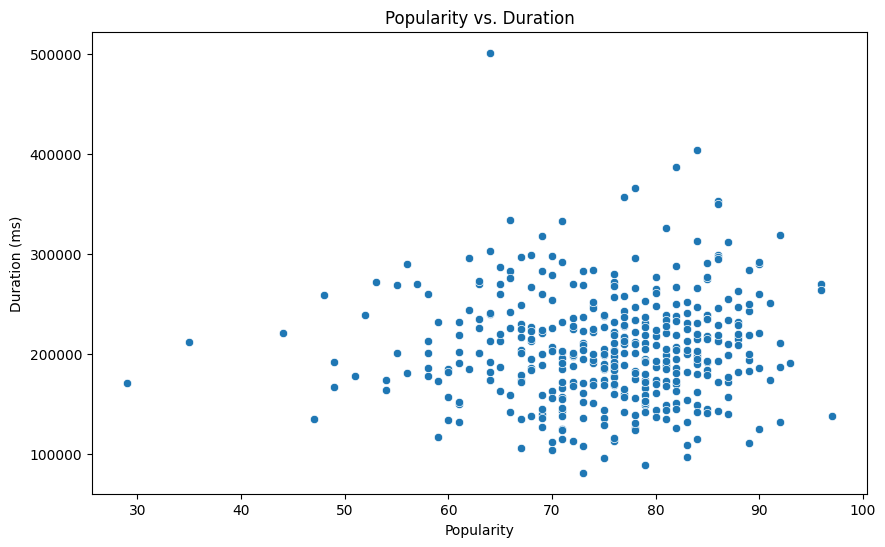

In [100]:
#Q-3>> Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(10,6))
sns.scatterplot(x='Popularity', y='Duration (ms)', data=df3)
plt.title('Popularity vs. Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

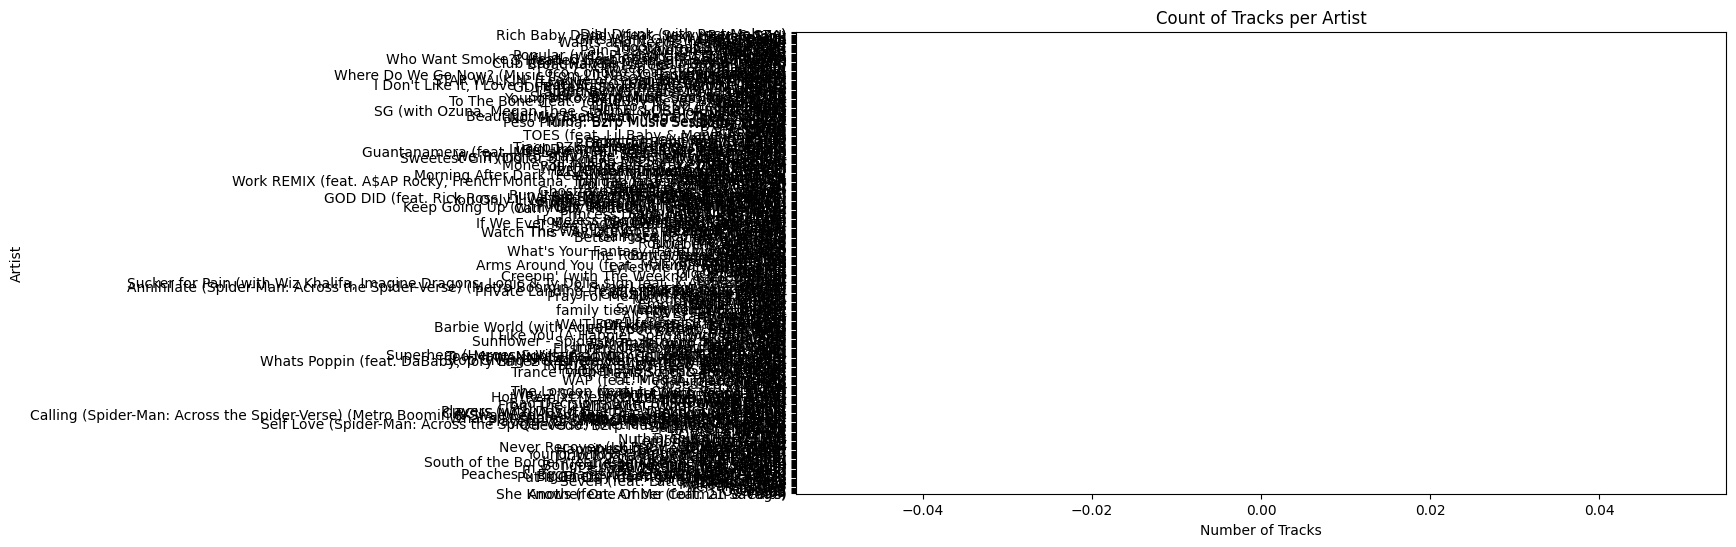

In [114]:
#Q-4>> Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=df3, order=df3['Track Name'].value_counts().index, palette='viridis')
plt.title('Count of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()


In [118]:
#Q-5>>  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
least_popular_tracks = df3.nsmallest(5, 'Popularity')

print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [119]:
#Q-6>>Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
top_artists = df3.groupby('Artist')['Popularity'].mean().nlargest(5)

print(top_artists)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [121]:
#-Q-7>> For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?
top_5_artists_list = top_artists.index
for artist in top_5_artists_list:
    most_popular_track = df3[df3['Artist'] == artist].nlargest(1, 'Popularity')
    print(f"Most popular track for {artist}: {most_popular_track['Track Name'].values[0]}")

Most popular track for cassö: Prada
Most popular track for Trueno: Mamichula - con Nicki Nicole
Most popular track for David Guetta: Baby Don't Hurt Me
Most popular track for Travis Scott: FE!N (feat. Playboi Carti)
Most popular track for ¥$: CARNIVAL


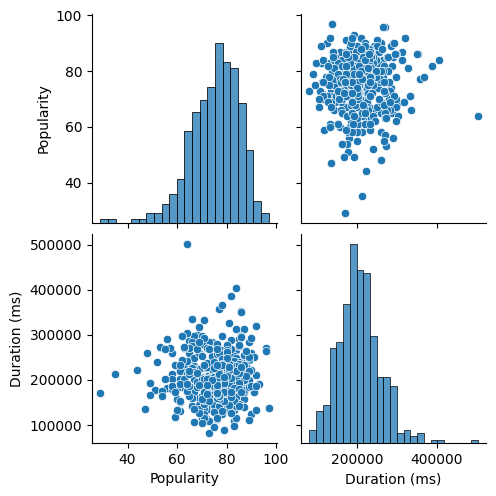

In [130]:
#Q-8>> Visualize relationships between multiple numerical variables simultaneously using a pair plot
# Selecting numerical columns for pair plot
numerical_columns = ['Popularity', 'Duration (ms)']
sns.pairplot(df3[numerical_columns])
plt.show()

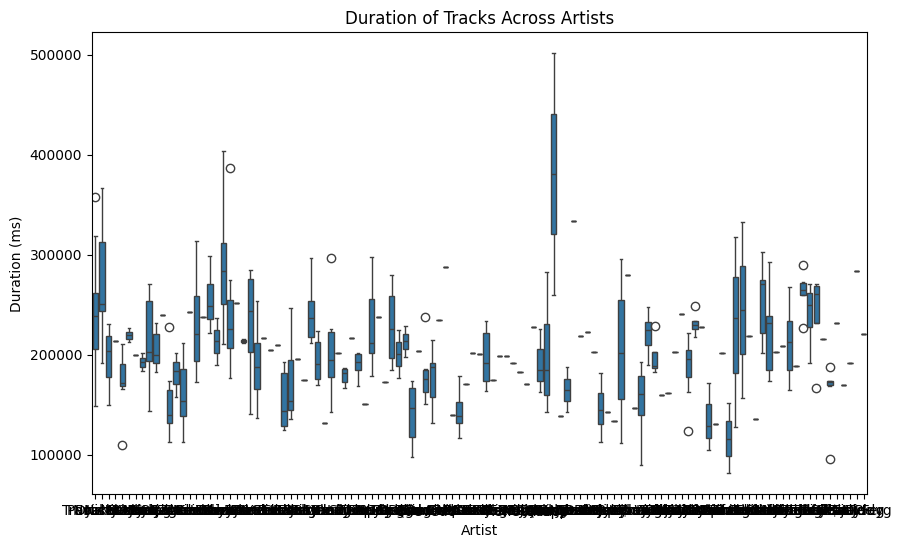

In [133]:
#Q-9>> Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df3)
plt.title('Duration of Tracks Across Artists')
plt.xlabel('Artist')
plt.show()

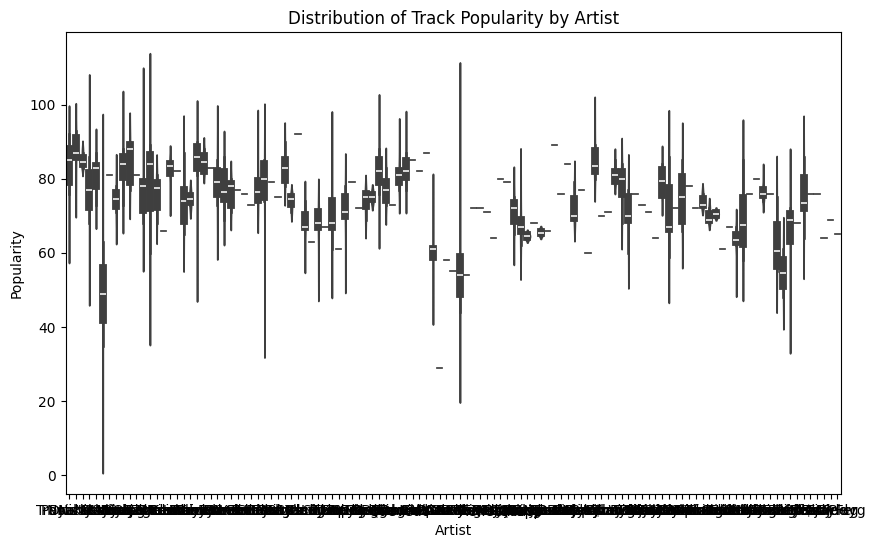

In [134]:
#Q-10>> How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or  violin plot.?
plt.figure(figsize=(10, 6))
sns.violinplot(x='Artist', y='Popularity', data=df3)
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.show()